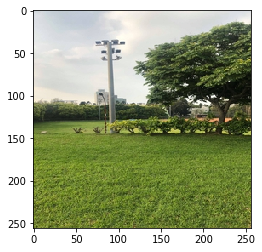

(<matplotlib.image.AxesImage at 0x1f94cc5f438>, None)

In [12]:
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread('1.jpg',1)
cv.imread('img')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img),plt.show()

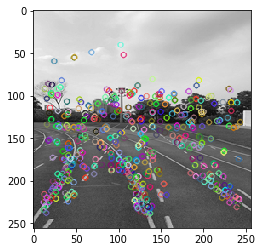

In [196]:
#gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
surf = cv.xfeatures2d.SURF_create()
kp = surf.detect(gray,None)
img1=cv.drawKeypoints(gray,kp,img)
img1= cv.cvtColor(img1, cv.COLOR_BGR2RGB)
cv.imwrite('surf_keypoints.jpg',img1)
cv.imread('img')
plt.imshow(img1)

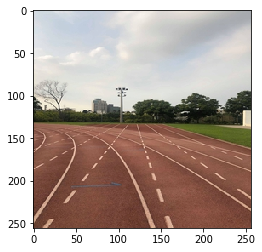

(<matplotlib.image.AxesImage at 0x2719ce2aeb8>, None)

In [197]:
img3 = cv.imread('46.jpg')
cv.imread('img3')
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
plt.imshow(img3),plt.show()

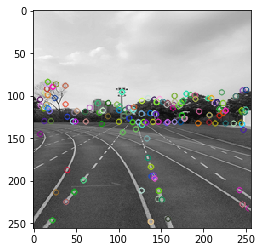

In [198]:
gray= cv.cvtColor(img3,cv.COLOR_BGR2GRAY)
sift = cv.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)
img2=cv.drawKeypoints(gray,kp,img3)
cv.imwrite('sift_keypoints.jpg',img2)
plt.imshow(img2)

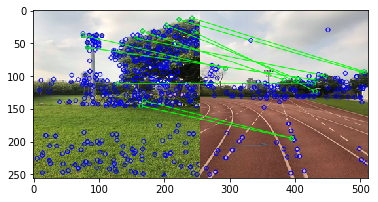

(<matplotlib.image.AxesImage at 0x2719d20f438>, None)

In [208]:
img1 = cv.imread('1.jpg', 1)          # queryImage
img2 = cv.imread('46.jpg', 1) # trainImage
#img1 = cv2.resize(img1,(128,128))
#img2 = cv2.resize(img2, (128,128))

sift = cv.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.78*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
img3= cv.cvtColor(img3, cv.COLOR_BGR2RGB)

plt.imshow(img3,),plt.show()

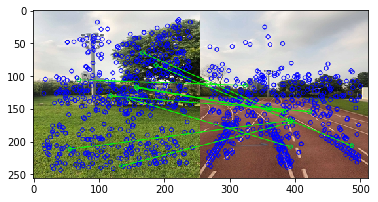

(<matplotlib.image.AxesImage at 0x2719d1b87b8>, None)

In [207]:
img1 = cv.imread('1.jpg', 1)          # queryImage
img2 = cv.imread('46.jpg', 1) # trainImage
#img1 = cv2.resize(img1,(128,128))
#img2 = cv2.resize(img2, (128,128))

surf = cv.xfeatures2d.SURF_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = surf.detectAndCompute(img1,None)
kp2, des2 = surf.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.78*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
img3= cv.cvtColor(img3, cv.COLOR_BGR2RGB)

plt.imshow(img3,),plt.show()